In [89]:
include("..\\Model_Reduction_Dev.jl")
include("AnalysisToolbox_scratch_ckms.jl")


using PyPlot

function visual_test_ckms(P,l,nfft)
    d  = size(P,1)
    lp = size(P,3)
    ll = size(l,3)
    S_fun(z)    = P[:,:,1] + sum(P[:,:,i]*z^(-i+1) + P[:,:,i]'*z^(i-1) for i = 2:lp)
    S_fun_minus(z) = sum(l[:,:,i]*z^(-i+1) for i = 1:ll)
    S_fun_plus(z) = sum(l[:,:,i]'*z^(i-1) for i = 1:ll)

    Θ = 2π*(0:nfft-1)/nfft
    Z = exp.(im*Θ)
    S = complex(zeros(d,d,nfft))
    S_l = complex(zeros(d,d,nfft))
    for i = 1:nfft
        S[:,:,i] = S_fun(Z[i])
        S_l[:,:,i] = S_fun_minus(Z[i])*S_fun_plus(Z[i])
    end


    for i = 1:d
        for j = i:d
            plot(Θ,real(S[i,j,:]), label = "S $i $j")
            plot(Θ,real(S_l[i,j,:]),":", label = "S_l $i $j")
        end
    end
    legend()
end

visual_test_ckms (generic function with 1 method)

### Example 1: Scalar function

In [3]:
P = zeros(1,1,2)
P[1,1,1] = 10
P[1,1,2] = 3

L = spectfact_matrix_CKMS(P)

1×1×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.000000000000001 + 0.0im

[:, :, 2] =
 0.9999999999999998 + 0.0im

In [17]:
L, Err = spectfact_matrix_CKMS_SC(P);

i : 12


In [13]:
L

1×1×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0000000000005254 + 0.0im

[:, :, 2] =
 0.999999999999825 + 0.0im

### Example 2: 2×2-Diagonal Matrix

In [32]:
P = zeros(2,2,2)
P[:,:,1] = [10 0 ; 0 84]
P[:,:,2] = [3 0; 0 38]

l = spectfact_matrix_CKMS(P)

2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0+0.0im      0.0+0.0im
 0.0-0.0im  7.73877+0.0im

[:, :, 2] =
 1.0+0.0im      0.0+0.0im
 0.0+0.0im  4.91034+0.0im

In [26]:
ρ = (-42 + sqrt(42^2 - 38^2))/38

(sqrt(-38/ρ),-ρ*sqrt(-38/ρ))

(7.738768882709854, 4.910341757963664)

In [30]:
L, Err = spectfact_matrix_CKMS_SC(P);
L

i : 29


2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0+0.0im      0.0+0.0im
 0.0-0.0im  7.73877+0.0im

[:, :, 2] =
 1.0+0.0im      0.0+0.0im
 0.0+0.0im  4.91034+0.0im

### Example 3: 2×2-nondiagonal Matrix 

In [5]:
P = zeros(2,2,2)
P[:,:,1] = [174 17 ; 17 42]
P[:,:,2] = [-2 -4; -79 -8]

l_ana = zeros(2,2,2)
l_ana[:,:,1] = [1 13; 2 1]
l_ana[:,:,2] = [-2 0; -1 -6]

l_num = spectfact_matrix_CKMS(P)

2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 13.0+0.0im  1.0+0.0im
  1.0-0.0im  2.0+0.0im

[:, :, 2] =
  0.0+0.0im  -2.0+0.0im
 -6.0+0.0im  -1.0-0.0im

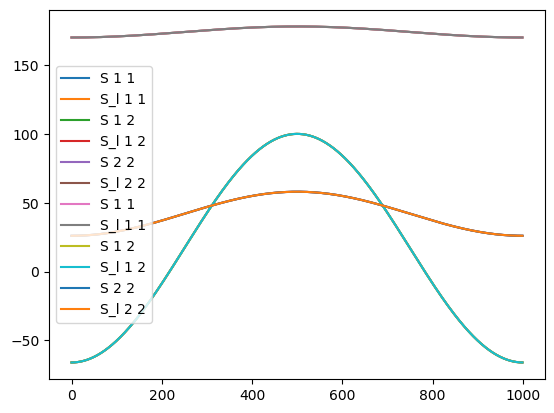

PyObject <matplotlib.legend.Legend object at 0x00000000563A9B88>

In [6]:
nfft = 1000
visual_test_ckms(P,l_num,nfft)
visual_test_ckms(P,l_ana,nfft)

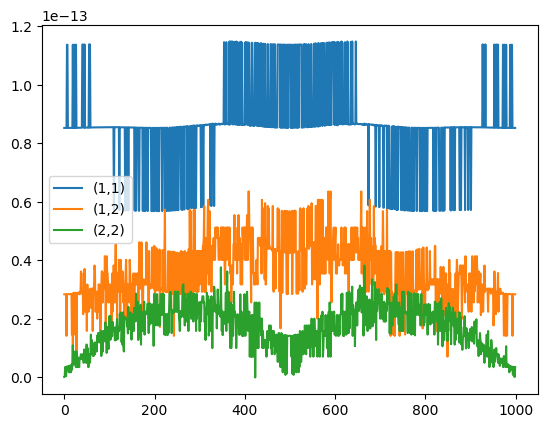

PyObject <matplotlib.legend.Legend object at 0x0000000034737E88>

In [27]:
ll_ana = size(l_ana,3)
ll_num = size(l_num,3)

S_ana_fun_minus(z) = sum(l_ana[:,:,i]*z^(-i+1) for i = 1:ll_ana)
S_num_fun_minus(z) = sum(l_num[:,:,i]*z^(-i+1) for i = 1:ll_num)

res(z) = S_ana_fun_minus(z)*S_ana_fun_minus(z^(-1))' -
            S_num_fun_minus(z)*S_num_fun_minus(z^(-1))'

d= 2; nfft = 10^3
Res = complex(zeros(d,d,nfft))
for i = 1:nfft
    Res[:,:,i] = res(exp(im*2π*i/nfft))
end

for i = 1:d
  for j = i:d
    plot(abs.(Res[i,j,:]),label = "($i,$j)")
  end
end
legend()

### Example 4: 2×2-nondiagonal Matrix (from JLE)

This example is an interesting one because its determinant has two unit-cirlce double zeros, indeed the determinant of $P(z)$ is 
$$\det(P(z)) = -\dfrac{(z-1)^2(z+1)^2}{z^2}$$
Which we can check still satisfise Paley-Wiener ($\log\det P(z) \in L^1(\mathbb{T})$

In [26]:
P = zeros(2,2,2)
P[:,:,1] = [6 22; 22 84]
P[:,:,2] = [2 7; 11 38]

l_ana = zeros(2,2,2)
l_ana[:,:,1] = [2 1; 7 3]
l_ana[:,:,2] = [1 0; 5 1]

l_num = spectfact_matrix_CKMS(P)

2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 0.744883+0.0im  2.10906+0.0im
  2.10906-0.0im  7.32076+0.0im

[:, :, 2] =
 -0.121272-0.0im  0.991122+0.0im
  0.382301-0.0im   5.08058+0.0im

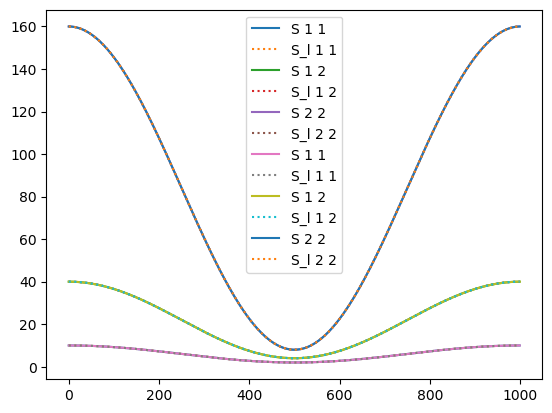

PyObject <matplotlib.legend.Legend object at 0x0000000044714F08>

In [27]:
nfft = 1000
visual_test_ckms(P,l_num,nfft)
visual_test_ckms(P,l_ana,nfft)

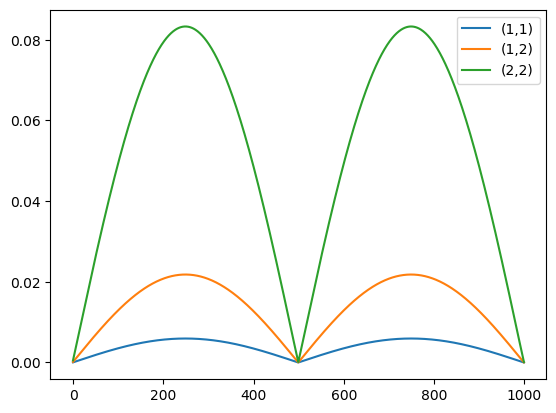

PyObject <matplotlib.legend.Legend object at 0x00000000345DDA88>

In [24]:
ll_ana = size(l_ana,3)
ll_num = size(l_num,3)


S_ana_fun_minus(z) = sum(l_ana[:,:,i]*z^(-i+1) for i = 1:ll_ana)
S_num_fun_minus(z) = sum(l_num[:,:,i]*z^(-i+1) for i = 1:ll_num)

res(z) = S_ana_fun_minus(z)*S_ana_fun_minus(z^(-1))' -
            S_num_fun_minus(z)*S_num_fun_minus(z^(-1))'

d= 2; nfft = 10^3
Res = complex(zeros(d,d,nfft))
for i = 1:nfft
    Res[:,:,i] = res(exp(im*2π*i/nfft))
end

for i = 1:d
  for j = i:d
    plot(abs.(Res[i,j,:]),label = "($i,$j)")
  end
end
legend()

### Example 5: Randomly Generated Autocovariance Matrix

To generate an admissible autocovariance sequence $A$, of course, we must have $A(0) > 0$. Antisymetry
$A(-i) = A(i)^*$ is built in to the process so we only need to define $A(i)$ for $i \ge 0$. The tricky thing is that we require that the spectrum here generated by positive definite on the unit cirlce. It is enough to verify that graph of the the determinant on the unit cirle is positive. The code attempts to tend toward ths condition by making $A(0)$ be greater than the sum of the other terms.

In [105]:
d = 3; m = 10
P = zeros(d,d,m)
for i = 2 : m
    b = randn(d,d)
    P[:,:,i] = b
end
b = randn(d,d)
P[:,:,1] = b*b' + sum(P[:,:,i]*P[:,:,i]' for i = 2:m) + 1e-10*I;

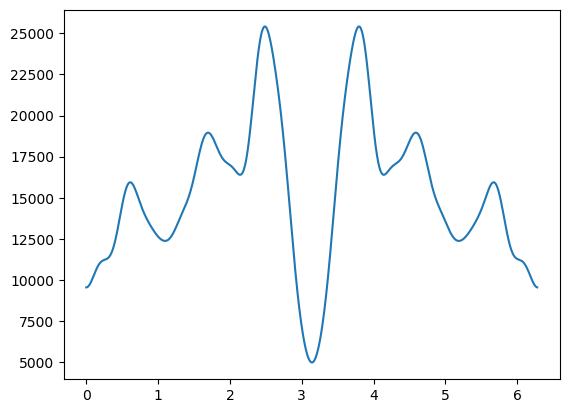

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000061387348>

In [106]:
d  = size(P,1)
lp = size(P,3)
S_fun(z)    = P[:,:,1] + sum(P[:,:,i]*z^(-i+1) + P[:,:,i]'*z^(i-1) for i = 2:lp)

Θ = 2π*(0:nfft-1)/nfft
Z = exp.(im*Θ)
detS = zeros(nfft)
for i = 1:nfft
    detS[i] = real(det(S_fun(Z[i])))
end
plot(Θ,detS)


i : 60


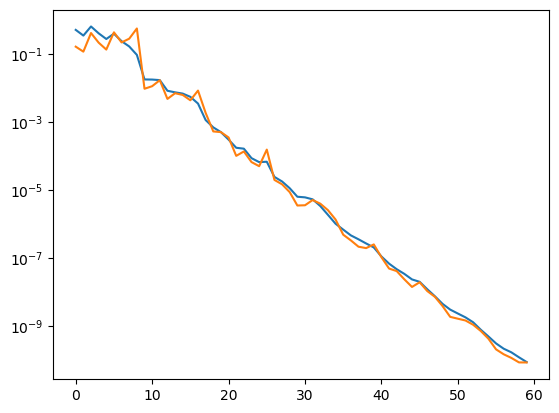

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000613AC908>
 PyObject <matplotlib.lines.Line2D object at 0x0000000061409048>

In [108]:
semilogy(Err)

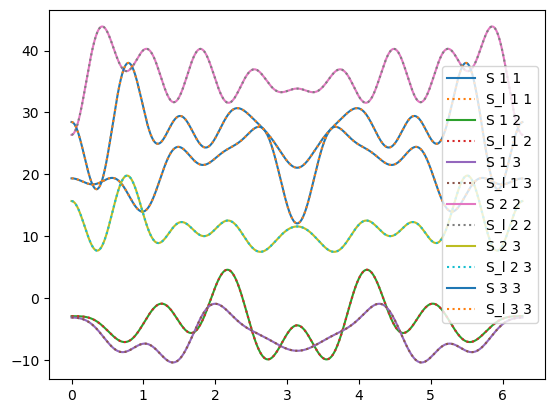

PyObject <matplotlib.legend.Legend object at 0x0000000051683C48>

In [109]:
nfft = 1000
visual_test_ckms(P,l_num,nfft)

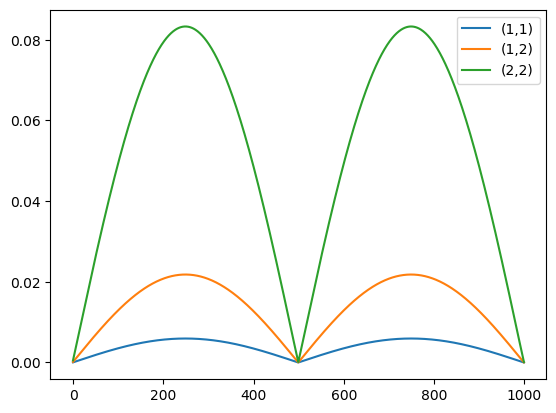

PyObject <matplotlib.legend.Legend object at 0x00000000345DDA88>

In [24]:
ll_ana = size(l_ana,3)
ll_num = size(l_num,3)


S_ana_fun_minus(z) = sum(l_ana[:,:,i]*z^(-i+1) for i = 1:ll_ana)
S_num_fun_minus(z) = sum(l_num[:,:,i]*z^(-i+1) for i = 1:ll_num)

res(z) = S_ana_fun_minus(z)*S_ana_fun_minus(z^(-1))' -
            S_num_fun_minus(z)*S_num_fun_minus(z^(-1))'

d= 2; nfft = 10^3
Res = complex(zeros(d,d,nfft))
for i = 1:nfft
    Res[:,:,i] = res(exp(im*2π*i/nfft))
end

for i = 1:d
  for j = i:d
    plot(abs.(Res[i,j,:]),label = "($i,$j)")
  end
end
legend()